In [1]:
! pip install liac-arff pandas matplotlib seaborn scikit-learn scipy


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\Pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:


file_path = "Autism_Data.arff"


df = pd.read_csv('Autism_Data.arff')


data = pd.DataFrame(df)


print(data.head())
print(data.info())


print(data.describe())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice austim  \
0         1         0          0  ...      f  White-European      no     no   
1         1         0          1  ...      m          Latino      no    yes   
2         1         1          1  ...      m          Latino     yes    yes   
3         1         0          1  ...      f  White-European      no    yes   
4         1         0          0  ...      f               ?      no     no   

     contry_of_res used_app_before result       age_desc relation Class/AS

In [4]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Valores únicos em '{col}':")
    print(data[col].unique())
    print("\n")


Valores únicos em 'age':
['26' '24' '27' '35' '40' '36' '17' '64' '29' '33' '18' '31' '30' '34'
 '38' '42' '43' '48' '37' '55' '50' '53' '20' '28' '21' '383' '47' '32'
 '44' '?' '19' '58' '45' '22' '39' '25' '23' '54' '60' '41' '46' '56' '61'
 '59' '52' '49' '51']


Valores únicos em 'gender':
['f' 'm']


Valores únicos em 'ethnicity':
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian'
 "'Middle Eastern '" 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish'
 'others']


Valores únicos em 'jundice':
['no' 'yes']


Valores únicos em 'austim':
['no' 'yes']


Valores únicos em 'contry_of_res':
["'United States'" 'Brazil' 'Spain' 'Egypt' "'New Zealand'" 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland'
 "'United Arab Emirates'" 'Afghanistan' 'Lebanon' "'United Kingdom'"
 "'South Africa'" 'Italy' 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China'
 'Australia' 'Canada' "'Saudi Arabia'" 'Netherlands' 'Romania' 'Sweden'
 'Tonga' 'Oman' 'India' 'Philippines' "'Sri Lanka'" "'Sierra Leo

In [5]:
data.replace('?', pd.NA, inplace=True)

print(data.isnull().sum())

data.dropna(inplace=True)

# for col in categorical_columns:
#     if data[col].isnull().sum() > 0:
#         data[col].fillna(data[col].mode()[0], inplace=True)



A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


In [6]:
le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

for col in categorical_columns:
    print(f"Valores únicos em '{col}':")
    print(data[col].unique())
    print("\n")

Valores únicos em 'age':
[ 9  7 10 18 19  0 45 12 16  1 14 13 26 24 32 20 39 34 17 37  3 11  4 22
 31 27 15 28  2 41  5 23  8  6 21 38 43 25 30 29 40 44 42 36 33 35]


Valores únicos em 'gender':
[0 1]


Valores únicos em 'ethnicity':
[ 9  5  6  3  2  0  7  1  4  8 10]


Valores únicos em 'jundice':
[0 1]


Valores únicos em 'austim':
[0 1]


Valores únicos em 'contry_of_res':
[ 9 22 54  2 18 23 40 38  7 11  8  5 39 48 29 19 25 32 26 16 24  3 44 51
 55 56 47 35 49  6  4 30 10 37  0 33 42 14 34 45 17 52 12 59 58 53 50 41
 28 46 20 21 15 31 57 43 36 13  1 27]


Valores únicos em 'used_app_before':
[0 1]


Valores únicos em 'age_desc':
[0]


Valores únicos em 'relation':
[4 2 0 3 1]


Valores únicos em 'Class/ASD':
[0 1]




In [7]:
# Inicializar o StandardScaler
scaler = StandardScaler()

# Selecionar colunas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Aplicar o scaler
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print(data.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0  0.591889  1.062719  1.038508  0.959758 -1.052267 -0.665679  1.154701   
1  0.591889  1.062719 -0.962920  0.959758 -1.052267 -0.665679 -0.866025   
2  0.591889  1.062719 -0.962920  0.959758  0.950329 -0.665679  1.154701   
3  0.591889  1.062719 -0.962920  0.959758 -1.052267 -0.665679  1.154701   
5  0.591889  1.062719  1.038508  0.959758  0.950329 -0.665679  1.154701   

   A8_Score  A9_Score  A10_Score  ...  gender  ethnicity  jundice  austim  \
0  0.709721 -0.720211  -1.218899  ...       0          9        0       0   
1  0.709721 -0.720211   0.820413  ...       1          5        0       1   
2  0.709721  1.388483   0.820413  ...       1          5        1       1   
3  0.709721 -0.720211   0.820413  ...       0          9        0       1   
5  0.709721  1.388483   0.820413  ...       1          6        1       0   

   contry_of_res  used_app_before    result  age_desc  relation  Class/ASD  
0        

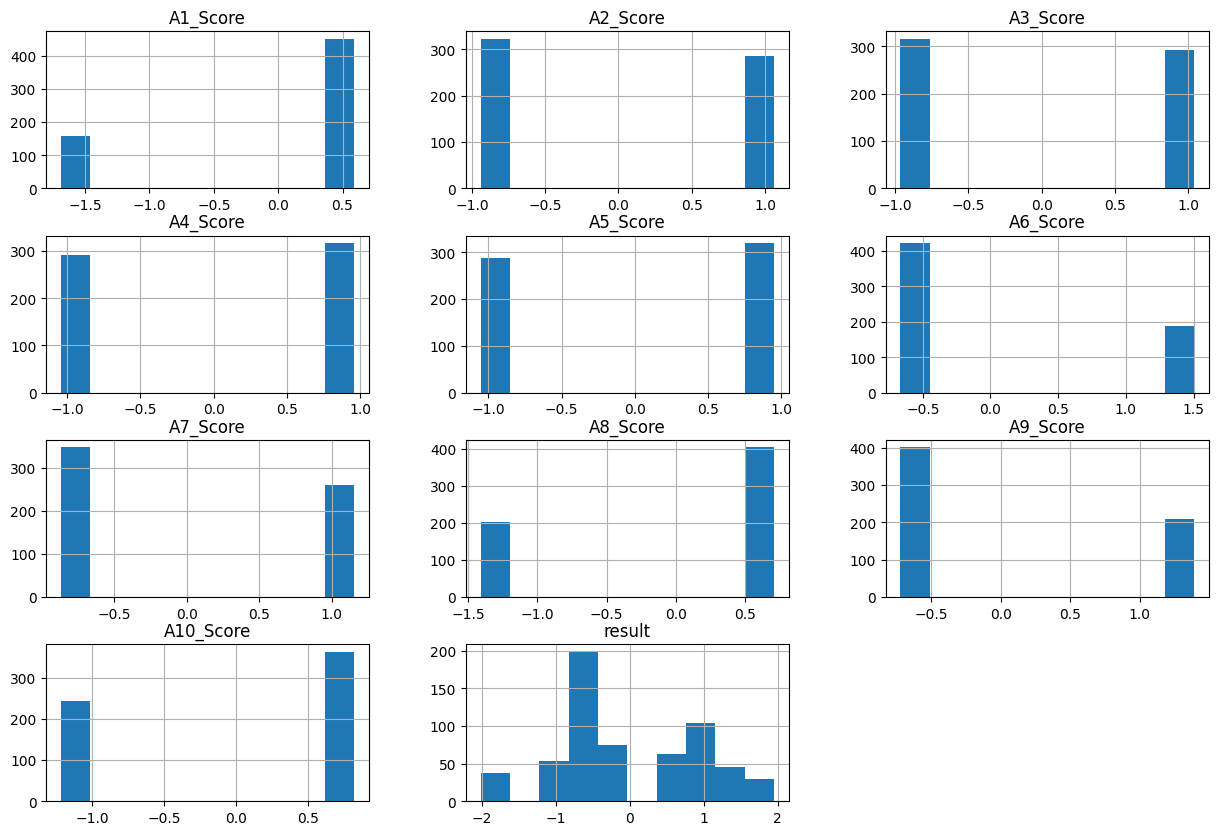

In [8]:
data[numeric_columns].hist(figsize=(15, 10))
plt.show()

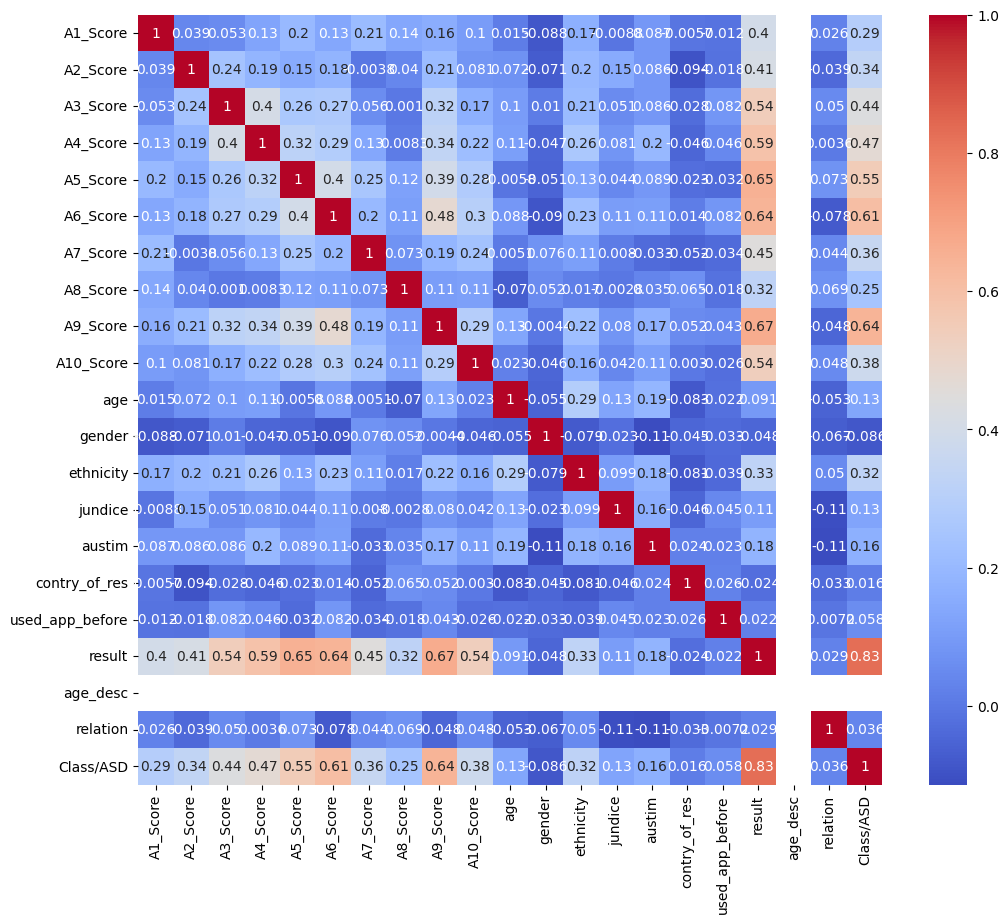

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

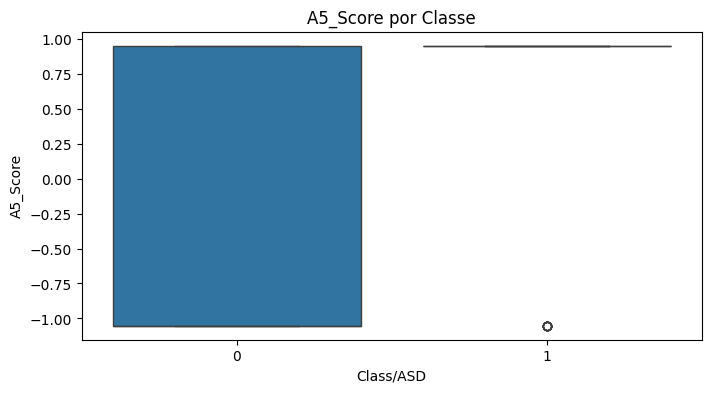

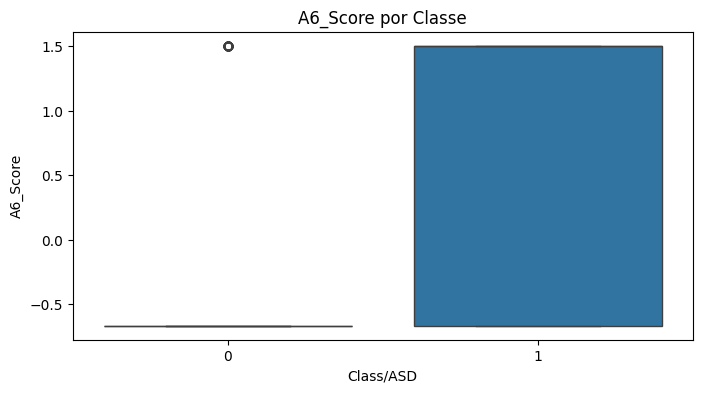

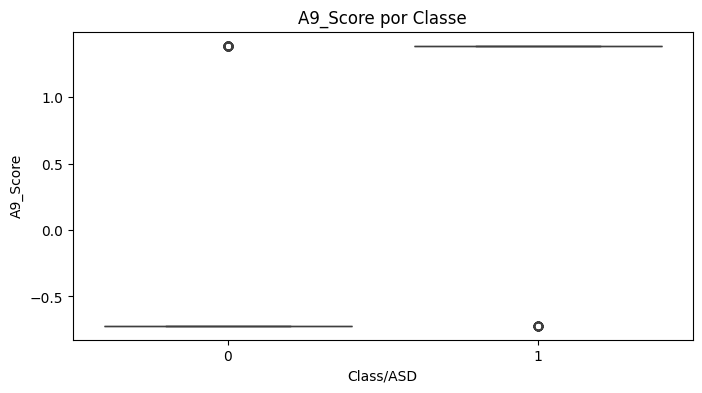

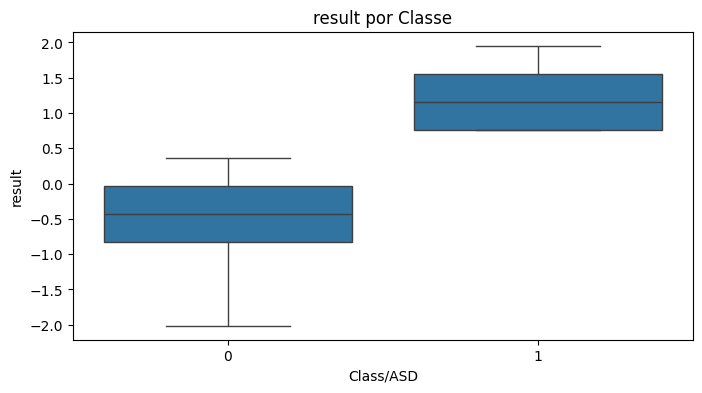

In [10]:

for col in ['A5_Score', 'A6_Score',  'A9_Score',  'result']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class/ASD', y=col, data=data)
    plt.title(f'{col} por Classe')
    plt.show()


In [11]:
X = data.drop(['Class/ASD'], axis=1)
y = data['Class/ASD']

# Dividir os dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

print(f'Treinamento: {X_train.shape}, Teste: {X_test.shape}')


Treinamento: (487, 20), Teste: (122, 20)


In [12]:
# Exemplo de Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Visualizar Importância das Features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Ranking das Features:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]:.4f}")


Ranking das Features:
result: 0.5208
A9_Score: 0.1012
A5_Score: 0.0814
A6_Score: 0.0706
A3_Score: 0.0381
A4_Score: 0.0342
A7_Score: 0.0301
ethnicity: 0.0219
A2_Score: 0.0192
A10_Score: 0.0189
contry_of_res: 0.0144
age: 0.0141
A1_Score: 0.0133
A8_Score: 0.0094
jundice: 0.0035
relation: 0.0029
gender: 0.0028
austim: 0.0021
used_app_before: 0.0011
age_desc: 0.0000


In [13]:
# Selecionar features com importância maior que 0.01
important_features = X_train.columns[importances > 0.06]
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

print("Features Selecionadas:", important_features)


Features Selecionadas: Index(['A5_Score', 'A6_Score', 'A9_Score', 'result'], dtype='object')


In [14]:
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    }
}


best_models = {}
for model_name, mp in model_params.items():
    print(f"Treinando {model_name} com GridSearchCV...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring="roc_auc", n_jobs=-1)
    grid.fit(X_train_reduced, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Melhores parâmetros para {model_name}: {grid.best_params_}\n")

Treinando Logistic Regression com GridSearchCV...
Melhores parâmetros para Logistic Regression: {'C': 1, 'solver': 'lbfgs'}

Treinando Random Forest com GridSearchCV...
Melhores parâmetros para Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Treinando SVM com GridSearchCV...
Melhores parâmetros para SVM: {'C': 1, 'kernel': 'linear'}

Treinando KNN com GridSearchCV...
Melhores parâmetros para KNN: {'n_neighbors': 3, 'weights': 'uniform'}



In [15]:
for model_name, model in best_models.items():
    print(f"Avaliando {model_name} com os melhores hiperparâmetros...")
    
    # Previsões no conjunto de teste
    y_pred = model.predict(X_test_reduced)
    
    # Relatório de Classificação
    print(f"Relatório de Classificação para {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matriz de Confusão para {model_name}:\n{cm}\n")
    print("-" * 50)

Avaliando Logistic Regression com os melhores hiperparâmetros...
Relatório de Classificação para Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        36

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

Matriz de Confusão para Logistic Regression:
[[86  0]
 [ 0 36]]

--------------------------------------------------
Avaliando Random Forest com os melhores hiperparâmetros...
Relatório de Classificação para Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        36

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

Matr

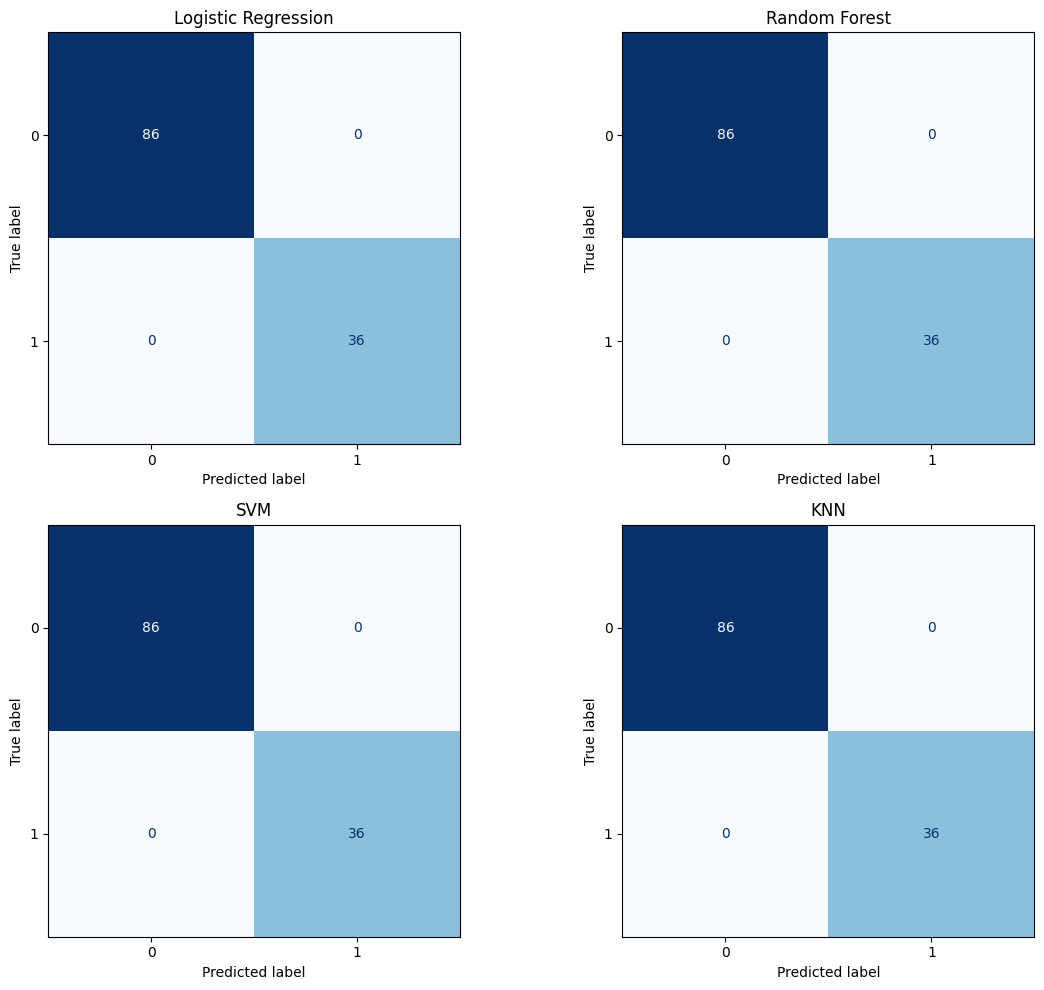

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  

for ax, (model_name, model) in zip(axes.flatten(), best_models.items()):

    y_pred = model.predict(X_test_reduced)
    

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.title.set_text(model_name)


plt.tight_layout()
plt.show()

In [17]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_reduced)
    print(f"Relatório de Classificação para {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Relatório de Classificação para Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        36

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

--------------------------------------------------
Relatório de Classificação para Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        36

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

--------------------------------------------------
Relatório de Classificação para SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

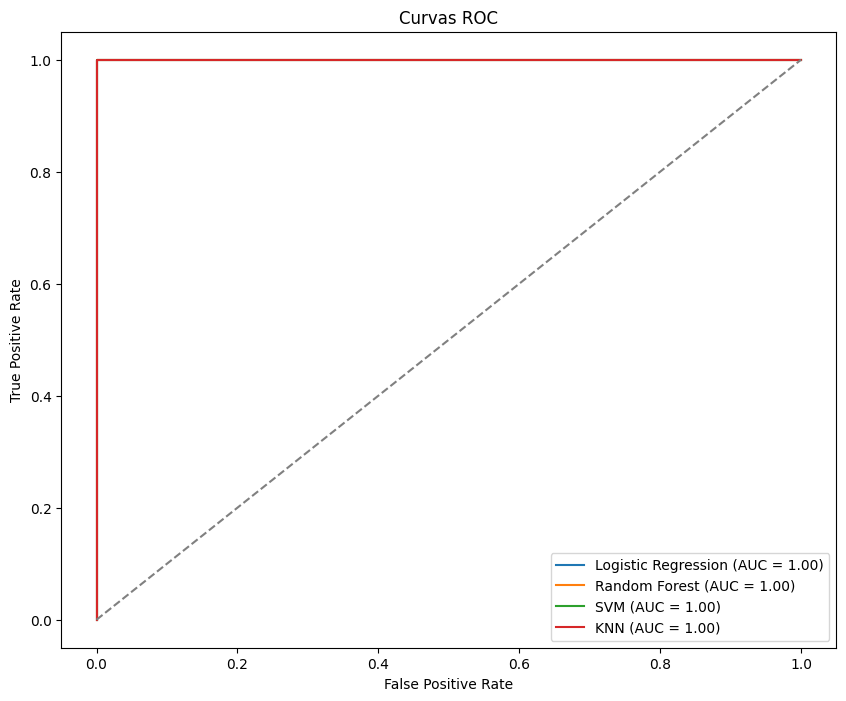

In [18]:
plt.figure(figsize=(10, 8))

# Plotar a Curva ROC para cada modelo
for model_name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Linha base
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.title("Curvas ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

for model_name, model in best_models.items():
    scores = cross_val_score(model, X_train_reduced, y_train, cv=5, scoring='accuracy')
    print(f"Validação cruzada para {model_name}: Média = {scores.mean():.4f}, Desvio = {scores.std():.4f}")


Validação cruzada para Logistic Regression: Média = 0.9979, Desvio = 0.0041
Validação cruzada para Random Forest: Média = 1.0000, Desvio = 0.0000
Validação cruzada para SVM: Média = 1.0000, Desvio = 0.0000
Validação cruzada para KNN: Média = 0.9938, Desvio = 0.0051


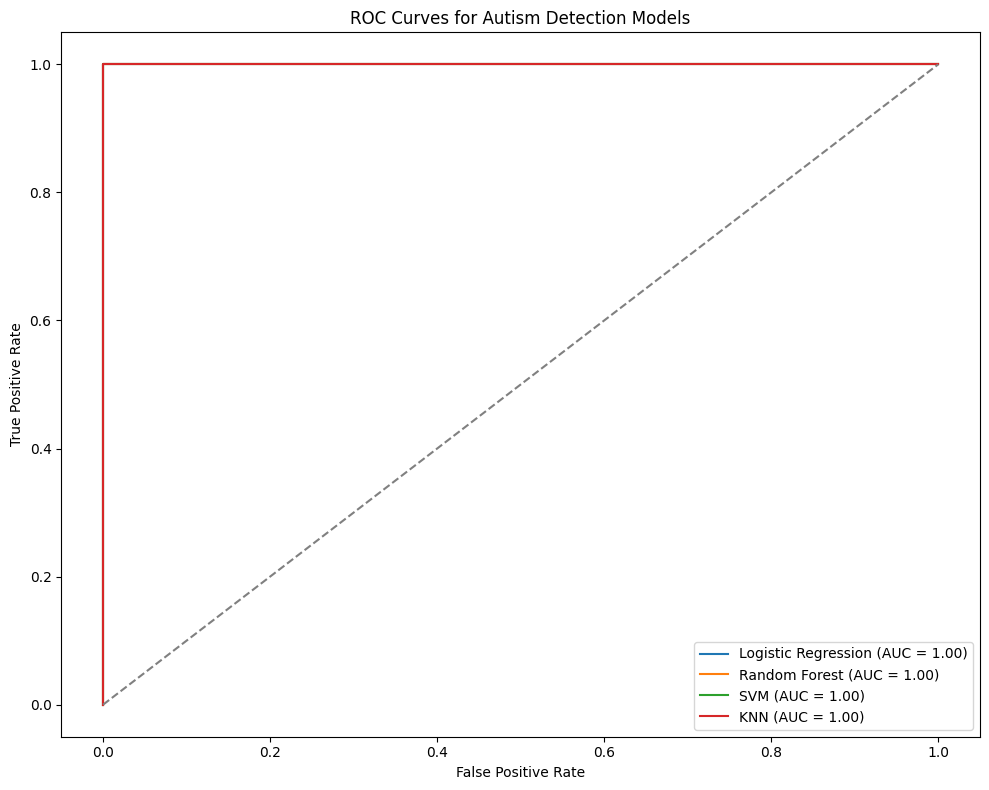

In [20]:


# Gerar Curvas ROC
plt.figure(figsize=(10, 8))

for model_name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Linha base
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.title("ROC Curves for Autism Detection Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("ROC_Curves_LinkedIn.png")  # Salva o gráfico para o post
plt.show()
